In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter
from scipy.special import erf

## Load comparison templates

In [3]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [4]:
epoch_n, wavelength_nugent, flux_nugent = np.loadtxt('../data/info_files/nugent_templates.dat', unpack = True)
epoch_n_91t, wavelength_nugent_91t, flux_nugent_91t = np.loadtxt('../data/info_files/nugent_91t_templates.dat', unpack = True)
epoch_n_91bg, wavelength_nugent_91bg, flux_nugent_91bg = np.loadtxt('../data/info_files/nugent_91bg_templates.dat', unpack = True)

In [5]:
phase_s, wavelength_salt, flux_salt = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_0.dat', unpack = True)

In [6]:
t_h, U_h, B_h, V_h, R_h, I_h, Y_h, J_h, H_h, K_h = np.loadtxt('../data/info_files/hsiao_lc_template.dat', unpack = True)

In [7]:
t_n, U_n, B_n, V_n, R_n, I_n, J_n, H_n, K_n = np.loadtxt('../data/info_files/nugent_light_curves.dat', unpack = True)

In [8]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

In [9]:
nug_temps = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps[float(epoch_n[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent[i]]
        temp_flux = [flux_nugent[i]]
    else:
        temp_wave.append(wavelength_nugent[i])
        temp_flux.append(flux_nugent[i])
    first = False

nug_temps_91t = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91t):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91t[float(epoch_n_91t[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91t[i]]
        temp_flux = [flux_nugent_91t[i]]
    else:
        temp_wave.append(wavelength_nugent_91t[i])
        temp_flux.append(flux_nugent_91t[i])
    first = False
    
nug_temps_91bg = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91bg):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91bg[float(epoch_n_91bg[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91bg[i]]
        temp_flux = [flux_nugent_91bg[i]]
    else:
        temp_wave.append(wavelength_nugent_91bg[i])
        temp_flux.append(flux_nugent_91bg[i])
    first = False

In [10]:
salt_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt[i])
    first = False

## Interpolate templates

In [11]:
wave_h = hsiao_temps[0.][0]
flux_h = hsiao_temps[0.][1]

In [12]:
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [13]:
wave_n = nug_temps[0.][0]
flux_n = nug_temps[0.][1]

wave_n_91t = nug_temps_91t[0.][0]
flux_n_91t = nug_temps_91t[0.][1]

wave_n_91bg = nug_temps_91bg[0.][0]
flux_n_91bg = nug_temps_91bg[0.][1]

In [14]:
wave_interp_n = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n = inter.splrep(wave_n, flux_n)
flux_interp_n = inter.splev(wave_interp_n, flux_spl_n, ext = 3)
n_template = composite.supernova(wave_interp_n,flux_interp_n)
n_template.phase_array = np.zeros(len(flux_interp_n))

wave_interp_n_91t = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91t = inter.splrep(wave_n_91t, flux_n_91t)
flux_interp_n_91t = inter.splev(wave_interp_n_91t, flux_spl_n_91t, ext = 3)
n_template_91t = composite.supernova(wave_interp_n_91t,flux_interp_n_91t)
n_template_91t.phase_array = np.zeros(len(flux_interp_n_91t))

wave_interp_n_91bg = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91bg = inter.splrep(wave_n_91bg, flux_n_91bg)
flux_interp_n_91bg = inter.splev(wave_interp_n_91bg, flux_spl_n_91bg, ext = 3)
n_template_91bg = composite.supernova(wave_interp_n_91bg,flux_interp_n_91bg)
n_template_91bg.phase_array = np.zeros(len(flux_interp_n_91bg))

In [15]:
wave_s = salt_temps[0.][0]
flux_s = salt_temps[0.][1]

In [16]:
wave_interp_s = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s = inter.splrep(wave_s, flux_s)
flux_interp_s = inter.splev(wave_interp_s, flux_spl_s, ext = 3)
s_template = composite.supernova(wave_interp_s, flux_interp_s)
s_template.phase_array = np.zeros(len(flux_interp_s))

## Maximum light - normal Ia composite spectrum

In [17]:
# query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1",
#          "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24))"]
query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [18]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query), query, boot='b', medmean=1, gini_balance = True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
173 Total Spectra found
105 questionable files currently ignored
(5, 'questionable spectra removed', 168, 'spectra left')
(3, 'Peculiar Ias removed', 165, 'spectra left')
151 valid spectra found
Arrays cleaned
4 spectra may have telluric contamination


composite.py:1214: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1251: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


99 total SNe
removed SNe without host corrections
Using 145 spectra of 96 SNe


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 25 iterations
Bootstrapping
scaling boots...


C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
67 Total Spectra found
105 questionable files currently ignored
(3, 'questionable spectra removed', 64, 'spectra left')
(0, 'Peculiar Ias removed', 64, 'spectra left')
55 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
36 total SNe
removed SNe without host corrections
Using 52 spectra of 34 SNe


gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


In [19]:
query_db.set_min_num_spec(composites, 5)

In [20]:
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

## Generate photometry from template spectra and compare to template light curves

In [21]:
import pyphot

In [22]:
from pyphot.vega import Vega
vega = Vega()
lib = pyphot.get_library()
f = lib['GROUND_JOHNSON_B']
# compute the integrated flux through the filter f
# note that it work on many spectra at once
fluxes = f.get_flux(vega.wavelength, vega.flux, axis=-1)
# convert to vega magnitudes
mags = -2.5 * np.log10(fluxes) - f.Vega_zero_mag
print("Vega magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.AB_zero_mag
print("AB magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.ST_zero_mag
print("ST magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))

Vega magnitude of Vega in GROUND_JOHNSON_B is : 0.000000 mag
AB magnitude of Vega in GROUND_JOHNSON_B is : -0.074212 mag
ST magnitude of Vega in GROUND_JOHNSON_B is : -0.587021 mag


In [23]:
lib = pyphot.get_library()
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
hsiao_fluxB = B.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_fluxV = V.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.Vega_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.Vega_zero_mag
print hsiao_magB, hsiao_magV
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.AB_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.AB_zero_mag
print hsiao_magB, hsiao_magV

-0.0387656219521 0.0423946332271
-0.112977534603 0.0345530104216


In [24]:
hsiao_B = []
hsiao_V = []
i=-20.
phases_h = []
while i <= np.amax(hsiao_temps.keys()):
    Bflux = B.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    hsiao_B.append(Bmag)
    hsiao_V.append(Vmag)
    phases_h.append(i)
    i+=1

In [25]:
nug_B = []
nug_V = []
i=-20.
phases_n = []
while i <= np.amax(nug_temps.keys()):
    Bflux = B.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    nug_B.append(Bmag)
    nug_V.append(Vmag)
    phases_n.append(i)
    i+=1

In [26]:
salt_B = []
salt_V = []
i=-20.
phases_s = []
while i <= np.amax(salt_temps.keys()):
    Bflux = B.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
#     Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    salt_B.append(Bmag)
    salt_V.append(Vmag)
    phases_s.append(i)
    i+=1

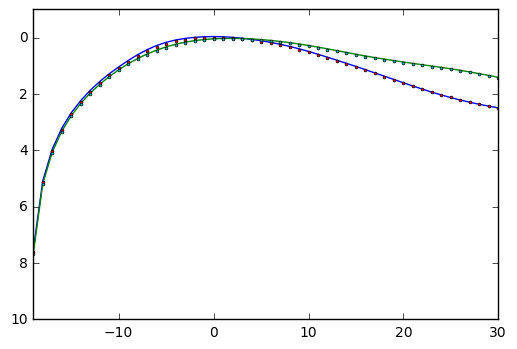

In [27]:
plt.plot(phases_h, hsiao_B)
plt.plot(phases_h, hsiao_V)
plt.plot(t_h, B_h, 'o', markersize=2)
plt.plot(t_h, V_h, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

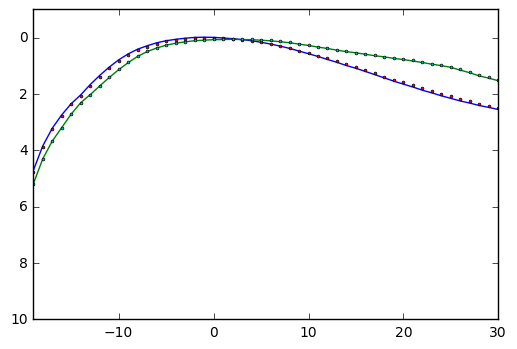

In [28]:
plt.plot(phases_n, nug_B)
plt.plot(phases_n, nug_V)
plt.plot(t_n, B_n, 'o', markersize=2)
plt.plot(t_n, V_n, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

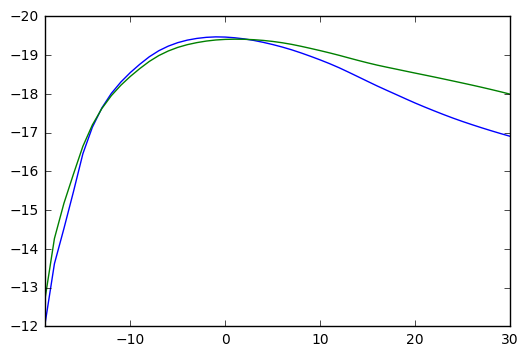

In [29]:
salt_B[0] = np.nan
salt_V[0] = np.nan
plt.plot(phases_s, salt_B)
plt.plot(phases_s, salt_V)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.show()

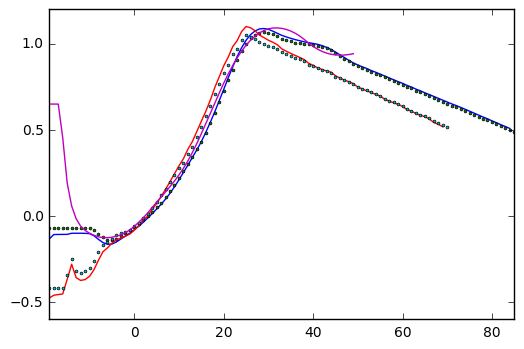

In [30]:
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V))
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'o', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V))
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'o', markersize=2)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V))
plt.xlim([-19,85])
plt.show()

## Composite spectral time series for normal - Ias and non dm15 controlled

In [31]:
#changeable phase bin size
query_strings_all = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_all.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"% (p1,p2))
    p1 += k
    p2 += k
print query_strings_all

['SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_f

In [32]:
query_strings_dm15 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_dm15.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_dm15:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >

In [33]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot='b', medmean=1, gini_balance = True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
ERROR:  sn2006oa-20061116-not.dat None
93 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 92, 'spectra left')
(0, 'Peculiar Ias removed', 92, 'spectra left')
84 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
35 total SNe
removed SNe without host corrections
Using 82 spectra of 34 SNe
Gini balancing...
Balanced after 21 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
ERROR:  2002bo_20020314_0_2_00.dat None
119 Total Spectra found
105 questionable files currently ignored
(2, 

In [34]:
composites_dm15, sn_arrays_dm15, boot_sn_arrays_dm15 = query_db.main(len(query_strings_dm15), query_strings_dm15, boot='b', medmean=1, gini_balance = True, verbose=False,combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
52 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 51, 'spectra left')
(0, 'Peculiar Ias removed', 51, 'spectra left')
49 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination
15 total SNe
removed SNe without host corrections
Using 47 spectra of 14 SNe
Gini balancing...
Balanced after 16 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
ERROR:  2002bo_20020314_0_2_00.dat None
52 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 51, 

## Average phases of each composite in time series

In [35]:
comp_phases = []
comp_B = []
comp_V = []
query_db.set_min_num_spec(composites_all, 5)
for comp in composites_all:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B.append(Bmag)
    comp_V.append(Vmag)
    comp_phases.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases
print comp_B
print comp_V

[-11.324308833612022, -8.8727631305329613, -6.9650933324420707, -5.0605836111418325, -2.9621933688983662, -0.96958657421611349, 0.993065515071894, 2.923564459947174, 4.9063740848495225, 7.0126276399470706, 8.8738904173725857, 10.928875411858913, 13.049881971883465, 14.96841014100905, 17.067116742853962, 18.916861147360013, 20.929288036477715, 23.155145423019, 25.030414372868631, 27.150871240600615, 28.917966422457294, 31.046136795729197, 33.684792906264335, 41.292441962791756, 47.945821499891615, 55.123624510976875]
[-20.057990792748086, -20.046675290981383, -20.028274807577397, -20.030355384059938, -20.048193457224531, -20.058476507714683, -20.064895228371569, -20.135127718869274, -20.087036373282174, -20.082729764260549, -20.061677739513925, -20.048361345393737, -19.974647964385856, -19.859535063794816, -19.801887939610921, -19.761157100268669, -19.74242516331843, -19.709975010992171, -19.673758869072739, -19.615304937249171, -19.5006938289084, -19.527824361748976, -19.60781122740597

In [36]:
comp_phases_dm15 = []
comp_B_dm15 = []
comp_V_dm15 = []
query_db.set_min_num_spec(composites_dm15, 5)
for comp in composites_dm15:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B_dm15.append(Bmag)
    comp_V_dm15.append(Vmag)
    comp_phases_dm15.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases_dm15
print comp_B_dm15
print comp_V_dm15

[-11.450611687472081, -8.7379469392235745, -6.9600363642498273, -5.0383354862856669, -2.979201176009282, -0.95797410185915977, 0.99074892098831668, 2.8721221335846518, 4.9891988080037386, 6.9862778973109032, 8.832292449671483, 11.064622718533853, 12.924853116666071, 15.158121835949135, 17.057070635529847, 18.970018856749668, 20.972693244865869, 23.18281086653997, 25.063266057921307, 27.173688673148686, 28.852393163028342, 30.97663613137961, 33.745141007647526, 41.368802745730079, 47.838930102197949, 55.298485133459657]
[-20.01945313042421, -20.023688559455895, -19.99920455268715, -20.014712305074099, -19.993886705665922, -20.027476556543188, -20.024365423293681, -20.118261691460674, -20.07962986389834, -20.075956332879535, -20.051199449997668, -20.028354271183126, -19.967112033209151, -19.860495741253953, -19.818299546047474, -19.729113684401543, -19.699864073101331, -19.73624648627214, -19.712734352404922, -19.585239799880544, -19.504794024298647, -19.491839952528217, -19.580295841346

## Measure error on composite colors from bootstrapped templates

In [37]:
#bootstrap colors
boot_BmVs = []
for boots in boot_sn_arrays_all:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs.append(BmV)

In [38]:
low_errors = []
up_errors = []
boot_resids = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
for k in range(len(boot_sn_arrays_all)):
    resids = []
    comp_BmVs = np.asarray(comp_B[k]) - np.asarray(comp_V[k])
    resids.append(boot_BmVs[k] - comp_BmVs)
    resid_sort = np.sort(resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
errors = [low_errors, up_errors]

In [39]:
#bootstrap colors dm15
boot_BmVs_dm15 = []
for boots in boot_sn_arrays_dm15:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs_dm15.append(BmV)

In [40]:
low_errors_dm15 = []
up_errors_dm15 = []
boot_resids_dm15 = []
for k in range(len(boot_sn_arrays_dm15)):
    resids = []
    comp_BmVs_dm15 = np.asarray(comp_B_dm15[k]) - np.asarray(comp_V_dm15[k])
    resids.append(boot_BmVs_dm15[k] - comp_BmVs_dm15)
    resids = [[x for x in resids[0] if str(x) != 'nan']]
    if k == 6:
        print resids, len(resids[0])
    resid_sort = np.sort(resids)[0]
    boot_resids_dm15.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors_dm15.append(np.absolute(resid_sort[low_ind]))
    up_errors_dm15.append(resid_sort[up_ind])
errors_dm15 = [low_errors_dm15, up_errors_dm15]

[[-0.010519589514178307, 0.04676914035445634, -0.0077499703565919731, 0.020250433680420343, 0.029778637179148859, -0.018270135748291949, 0.023711591294567569, -0.012405442005334777, -0.0301108665080001, 0.0048705613683637239, -0.0098543190732307551, 0.0080055898962818617, -0.011498192963983911, 0.00076676842139278278, 0.0096066130759098201, 0.0045260366389818785, 0.0038683032807753648, -0.00026751883115494479, -0.026043986526403273, 0.009928413003958525, -0.029787891036175296, 0.0082864524178098975, 0.027963140291834776, -0.0091468504265286299, 0.0048318318367108759, 0.002750533724920956, -0.025767690537705334, 0.0025128308265216504, 0.0042153415108252545, -0.0098846490249542285, 0.010153537015593628, 0.0005115493238818658, -0.014170156132802703, 0.013054963633834404, -0.0046428921776708876, -0.0049131648226001801, -0.012545929407782097, -0.02452519024742017, -0.014277758392022832, -0.0073682463939022114, 0.01496335529881776, 0.010449143910356895, 0.011505470193739598, 0.02288714638480

In [41]:
dm15s = []
for comp in composites_all:
    dm15s.append(np.nanmean(comp.dm15_array[comp.x1:comp.x2]))
print np.nanmean(dm15s)
print np.nanmin(dm15s), np.nanmax(dm15s)
dm15s = []
for comp in composites_dm15:
    dm15s.append(np.nanmean(comp.dm15_array[comp.x1:comp.x2]))
print np.nanmean(dm15s)
print np.amin(dm15s), np.amax(dm15s)

1.1085155671
1.01442595509 1.16370119094
1.08682337395
1.06237237092 1.10472541709


In [42]:
# import glob
# print glob.glob('../data/info_files/*.dat')
b_mlcs = np.genfromtxt('../data/info_files\\vectors_nouv-rv19-tweaked_B.dat', unpack=True)
v_mlcs = np.genfromtxt('../data/info_files\\vectors_nouv-rv19-tweaked_V.dat', unpack=True)

Last Run: 
Comp B-V: [-0.08861053 -0.1322069  -0.18027597 -0.16314625 -0.14427873 -0.10787173
 -0.08523533  0.03341819  0.03067842  0.10914749  0.20637226  0.27918586
  0.34939772  0.48464728  0.59639636  0.64618309  0.77223188  0.90318853
  0.94292851  0.96331938  1.03228379  1.0050061   0.97207978  0.95568688
  0.81379373  0.7814207 ]
Comp err:  [[0.031910944626883264, 0.022063399944926232, 0.014510624128003968, 0.013514465033615863, 0.014988545081827453, 0.016639312935026851, 0.015856054888757853, 0.025946706851645018, 0.026461767396625646, 0.0206115725049969, 0.023954172087933046, 0.021829428701281017, 0.023100073740565108, 0.024950597208430736, 0.048184375122414025, 0.034093505798306722, 0.038041314178649088, 0.044799523201383806, 0.02161134671733933, 0.041301472592504496, 0.032380214253858952, 0.017514712302673985, 0.033087027130477509, 0.01779609478848343, 0.044493110787456658, 0.03975415541388827], [0.037229646575887898, 0.019071462451414334, 0.018555103429054753, 0.01110238932

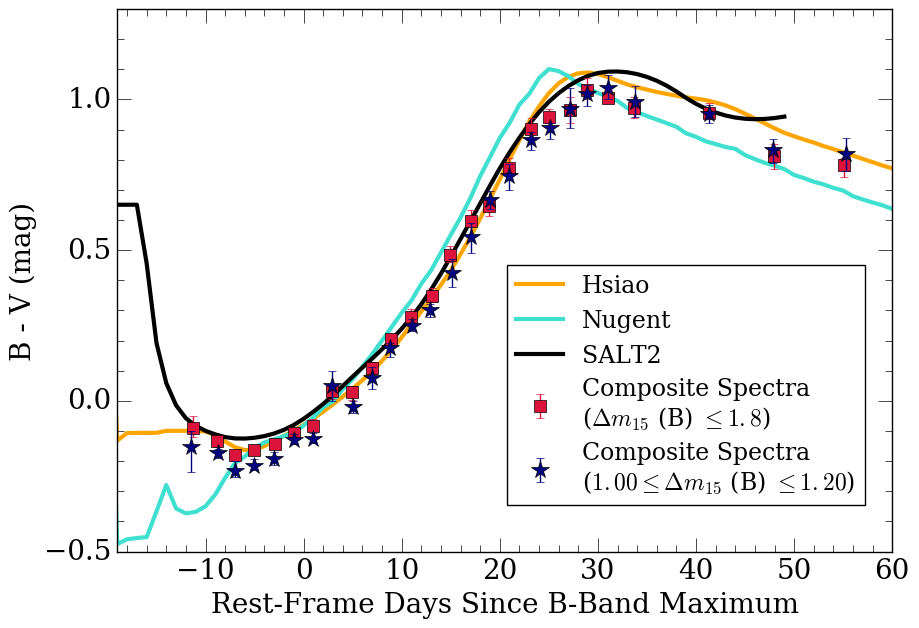

In [43]:
color_dict = {"Comp": "#000080", "Hsiao": "orange", "Nugent": "turquoise", "SALT-II": "black"}
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.xlabel('Rest-Frame Days Since B-Band Maximum', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V), color = color_dict['Hsiao'], label = 'Hsiao', linewidth=3, zorder=-1)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V), color = color_dict['Nugent'], label = 'Nugent', linewidth=3, zorder=-1)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V), color = color_dict['SALT-II'],label='SALT2', linewidth=3, zorder=-1)
# plt.plot(b_mlcs[0], b_mlcs[1] - v_mlcs[1], color = 'magenta', label = 'MLCS', linewidth=3, zorder=-1)
plt.errorbar(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), yerr=errors, fmt='s', markersize=8, color = "crimson", label = 'Composite Spectra \n($\Delta m_{15}$ (B) $\leq 1.8$)', zorder=-.6)
plt.errorbar(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), yerr=errors_dm15, fmt='*', markersize=13, color = color_dict['Comp'], label = 'Composite Spectra \n($1.00 \leq \Delta m_{15}$ (B) $\leq 1.20$)', zorder=-.5)
plt.xlim([-19,60])
plt.ylim([-.5,1.3])
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.48, 0.5),numpoints=1, fontsize=17)
plt.savefig('../../../Paper_Drafts/template_comparisons_updated/color_curve.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/color_curve.png', dpi = 300, bbox_inches = 'tight')
print 'Last Run: '
print 'Comp B-V:', np.asarray(comp_B) - np.asarray(comp_V)
print 'Comp err: ', errors
print 'Comp B-V dm15: ', np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15)
print 'Comp err: ', errors_dm15
plt.show()

## Foley08 Templates

In [44]:
wavelength_f08_m7, flux_f08_m7, low_f08_m7, up_f08_m7 = np.loadtxt('../data/foley/foley=0.01=-6.6=-0.08=0.37=47.flm', unpack = True)
wavelength_f08_0, flux_f08_0, low_f08_0, up_f08_0 = np.loadtxt('../data/foley/foley=0.02=0.5=-0.02=0.46=45.flm', unpack = True)
wavelength_f08_p6, flux_f08_p6, low_f08_p6, up_f08_p6 = np.loadtxt('../data/foley/foley=0.01=6.2=0.08=0.28=45.flm', unpack = True)
wavelength_f08_p14, flux_f08_p14, low_f08_p14, up_f08_p14 = np.loadtxt('../data/foley/foley=0.01=13.8=0.06=0.42=43.flm', unpack = True)
wavelength_f08_p19, flux_f08_p19, low_f08_p19, up_f08_p19 = np.loadtxt('../data/foley/foley=0.01=19.4=-0.02=0.59=26.flm', unpack = True)

In [45]:
#-1week
wave_interp_f08_m7 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_m7 = inter.splrep(wavelength_f08_m7, flux_f08_m7)
low_spl_f08_m7 = inter.splrep(wavelength_f08_m7, low_f08_m7)
up_spl_f08_m7 = inter.splrep(wavelength_f08_m7, up_f08_m7)

flux_interp_f08_m7 = inter.splev(wave_interp_f08_m7, flux_spl_f08_m7, ext = 3)
low_interp_f08_m7 = inter.splev(wave_interp_f08_m7, low_spl_f08_m7, ext = 3)
up_interp_f08_m7 = inter.splev(wave_interp_f08_m7, up_spl_f08_m7, ext = 3)

f08_template_m7 = composite.supernova(wave_interp_f08_m7, flux_interp_f08_m7, low_conf=low_interp_f08_m7, up_conf=up_interp_f08_m7)
f08_template_m7.phase_array = np.zeros(len(flux_interp_f08_m7))

#max
wave_interp_f08_0 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_0 = inter.splrep(wavelength_f08_0, flux_f08_0)
low_spl_f08_0 = inter.splrep(wavelength_f08_0, low_f08_0)
up_spl_f08_0 = inter.splrep(wavelength_f08_0, up_f08_0)

flux_interp_f08_0 = inter.splev(wave_interp_f08_0, flux_spl_f08_0, ext = 3)
low_interp_f08_0 = inter.splev(wave_interp_f08_0, low_spl_f08_0, ext = 3)
up_interp_f08_0 = inter.splev(wave_interp_f08_0, up_spl_f08_0, ext = 3)

f08_template_0 = composite.supernova(wave_interp_f08_0, flux_interp_f08_0, low_conf=low_interp_f08_0, up_conf=up_interp_f08_0)
f08_template_0.phase_array = np.zeros(len(flux_interp_f08_0))

#+1week
wave_interp_f08_p6 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p6 = inter.splrep(wavelength_f08_p6, flux_f08_p6)
low_spl_f08_p6 = inter.splrep(wavelength_f08_p6, low_f08_p6)
up_spl_f08_p6 = inter.splrep(wavelength_f08_p6, up_f08_p6)

flux_interp_f08_p6 = inter.splev(wave_interp_f08_p6, flux_spl_f08_p6, ext = 3)
low_interp_f08_p6 = inter.splev(wave_interp_f08_p6, low_spl_f08_p6, ext = 3)
up_interp_f08_p6 = inter.splev(wave_interp_f08_p6, up_spl_f08_p6, ext = 3)

f08_template_p6 = composite.supernova(wave_interp_f08_p6, flux_interp_f08_p6, low_conf=low_interp_f08_p6, up_conf=up_interp_f08_p6)
f08_template_p6.phase_array = np.zeros(len(flux_interp_f08_m7))

#+2week
wave_interp_f08_p14 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p14 = inter.splrep(wavelength_f08_p14, flux_f08_p14)
low_spl_f08_p14 = inter.splrep(wavelength_f08_p14, low_f08_p14)
up_spl_f08_p14 = inter.splrep(wavelength_f08_p14, up_f08_p14)

flux_interp_f08_p14 = inter.splev(wave_interp_f08_p14, flux_spl_f08_p14, ext = 3)
low_interp_f08_p14 = inter.splev(wave_interp_f08_p14, low_spl_f08_p14, ext = 3)
up_interp_f08_p14 = inter.splev(wave_interp_f08_p14, up_spl_f08_p14, ext = 3)

f08_template_p14 = composite.supernova(wave_interp_f08_p14, flux_interp_f08_p14, low_conf=low_interp_f08_p14, up_conf=up_interp_f08_p14)
f08_template_p14.phase_array = np.zeros(len(flux_interp_f08_p14))

#+19days
wave_interp_f08_p19 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p19 = inter.splrep(wavelength_f08_p19, flux_f08_p19)
low_spl_f08_p19 = inter.splrep(wavelength_f08_p19, low_f08_p19)
up_spl_f08_p19 = inter.splrep(wavelength_f08_p19, up_f08_p19)

flux_interp_f08_p19 = inter.splev(wave_interp_f08_p19, flux_spl_f08_p19, ext = 3)
low_interp_f08_p19 = inter.splev(wave_interp_f08_p19, low_spl_f08_p19, ext = 3)
up_interp_f08_p19 = inter.splev(wave_interp_f08_p19, up_spl_f08_p19, ext = 3)

f08_template_p19 = composite.supernova(wave_interp_f08_p19, flux_interp_f08_p19, low_conf=low_interp_f08_p19, up_conf=up_interp_f08_p19)
f08_template_p19.phase_array = np.zeros(len(flux_interp_f08_p19))

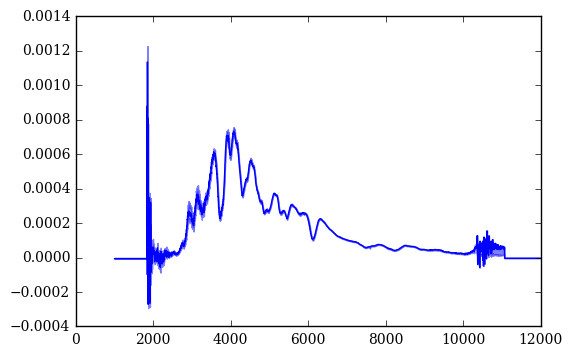

In [46]:
test_template = f08_template_0
plt.plot(test_template.wavelength[test_template.x1:test_template.x2],test_template.flux[test_template.x1:test_template.x2])
plt.fill_between(test_template.wavelength[test_template.x1:test_template.x2],test_template.low_conf[test_template.x1:test_template.x2], test_template.up_conf[test_template.x1:test_template.x2], color='b',alpha=.5)
# plt.ylim([-1,12])
plt.show()

## Spectral feature comparison at various epochs

In [47]:
query_db.set_min_num_spec(composites, 5)
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
srange = np.where((s_template.wavelength > 2000.) & (s_template.wavelength < 9200))[0]
s_template.x1 = srange[0]
s_template.x2 = srange[-1]
comps_and_temps.append(h_template)
comps_and_temps.append(f08_template_0)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
#     r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp = .002, plot=False)
#     print comp.name, 'r = ', r
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]],include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao",])

1.09873181739
1.09154086386
Comp v =  10899.6695413
Comp v =  10899.6695413
Hsiao v =  10997.3983334
Foley v =  11486.4857972
Nugent v =  12270.5626583
SALT2 v =  11290.7621201


In [48]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao",])

Phase:  0.0967016637809
dm15:  1.09873181739
Redshift:  0.0140900182379


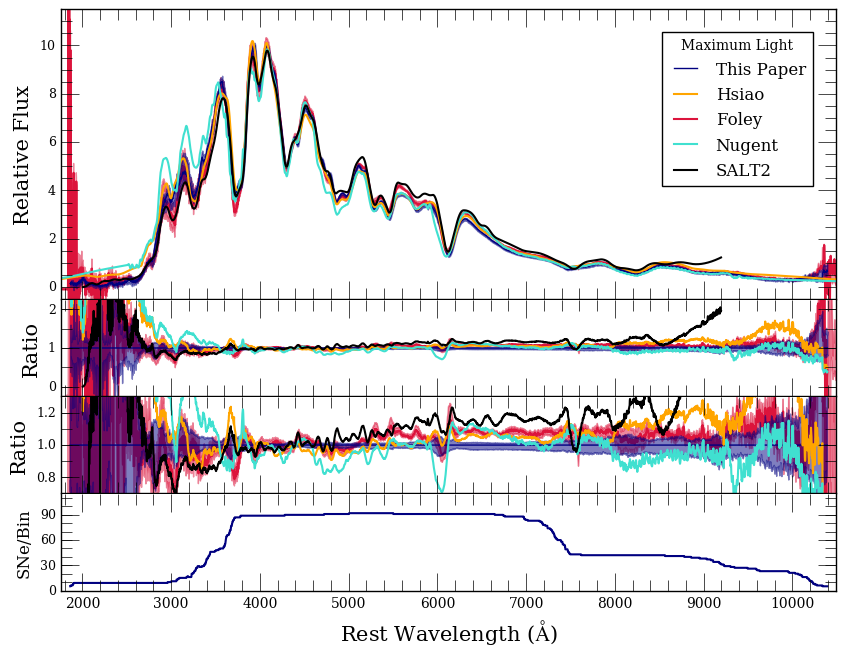

In [49]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
                     include_spec_bin=True, legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], 
                     rm_last_label=False, text='Maximum Light', savename = 'template_comparisons_updated/temp_max_light_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], text='Maximum Light',
#                      rm_last_label=True)

In [50]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, rm_last_label=True, legend_labels = ["This Paper \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao","Foley", "Nugent","SALT2"], 
#                      text='Maximum Light',savename = 'template_comparisons_updated/temp_max_light_dm15')

Phase:  0.0967016637809
dm15:  1.09873181739
Redshift:  0.0140900182379
Phase:  0.0673295810645
dm15:  1.09154086386
Redshift:  0.0131118857153


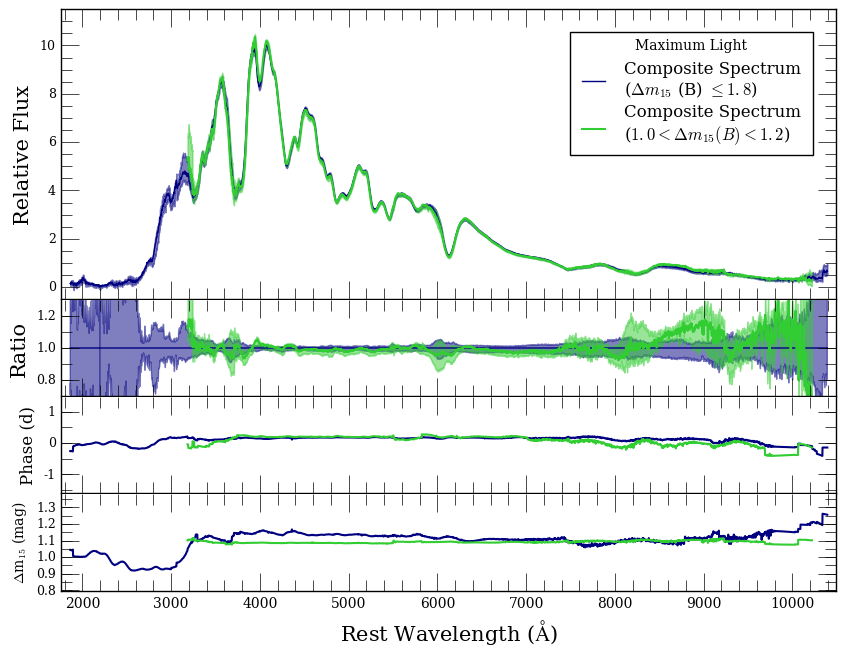

In [51]:
comps_and_temps[1].name = "Comp2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, include_phase_dm15=True, zoom=False,
                     legend_labels = ["Composite Spectrum \n($\Delta m_{15}$ (B) $\leq 1.8$)","Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)"],
                     text ='Maximum Light', savename = 'template_comparisons_updated/max_light_total_bin_comp')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, include_phase_dm15=True, zoom=False,
#                      legend_labels = ["Composite Spectrum \n($\Delta m_{15}$ (B) $\leq 1.8$)","Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)"],
#                      text ='Maximum Light')

In [52]:
wave_h_1week = []
flux_h_1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == 7.0:
        wave_h_1week.append(wavelength_hsiao[i])
        flux_h_1week.append(flux_hsiao[i])

In [53]:
wave_interp_h_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1week = inter.splrep(wave_h_1week, flux_h_1week)
flux_interp_h_1week = inter.splev(wave_interp_h_1week, flux_spl_h_1week, ext = 3)
h_template_1week = composite.supernova(wave_interp_h_1week, flux_interp_h_1week)
h_template_1week.phase_array = np.zeros(len(flux_interp_h_1week))

In [54]:
wave_n_1week = []
flux_n_1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 27.0:
        wave_n_1week.append(wavelength_nugent[i])
        flux_n_1week.append(flux_nugent[i])

In [55]:
wave_interp_n_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1week = inter.splrep(wave_n_1week, flux_n_1week)
flux_interp_n_1week = inter.splev(wave_interp_n_1week, flux_spl_n_1week, ext = 3)
n_template_1week = composite.supernova(wave_interp_n_1week,flux_interp_n_1week)
n_template_1week.phase_array = np.zeros(len(flux_interp_n_1week))

In [56]:
wave_s_1week = []
flux_s_1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == 7.0:
        wave_s_1week.append(wavelength_salt[i])
        flux_s_1week.append(flux_salt[i])

In [57]:
wave_interp_s_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1week = inter.splrep(wave_s_1week, flux_s_1week)
flux_interp_s_1week = inter.splev(wave_interp_s_1week, flux_spl_s_1week, ext = 3)
s_template_1week = composite.supernova(wave_interp_s_1week,flux_interp_s_1week)
s_template_1week.phase_array = np.zeros(len(flux_interp_s_1week))

In [58]:
query_1week = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 8 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [59]:
composites_1week, sn_arrays_1week, boot_sn_arrays_1week = query_db.main(len(query_1week), query_1week, boot='b', medmean=1, gini_balance=True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 8 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
164 Total Spectra found
105 questionable files currently ignored
(9, 'questionable spectra removed', 155, 'spectra left')
(2, 'Peculiar Ias removed', 153, 'spectra left')
141 valid spectra found
Arrays cleaned
3 spectra may have telluric contamination
96 total SNe
removed SNe without host corrections
Using 129 spectra of 92 SNe
Gini balancing...
Balanced after 30 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
56 Total Spectra found
105 questionable files currently ignored
(3, 'questionable spectra removed', 53, 'spectra left')
(0, 'Peculiar Ias remov

1.11154164532
1.09217784137
Comp v =  10801.9703211 6130.0
Comp v =  10801.9703211 6130.0
Hsiao v =  10899.6695413 6128
Foley v =  10997.3983334 6126
Nugent v =  10606.6606057 6134
SALT2 v =  10801.9703211 6130
Phase:  7.01262763995
dm15:  1.11709610587
Redshift:  0.0145652397598


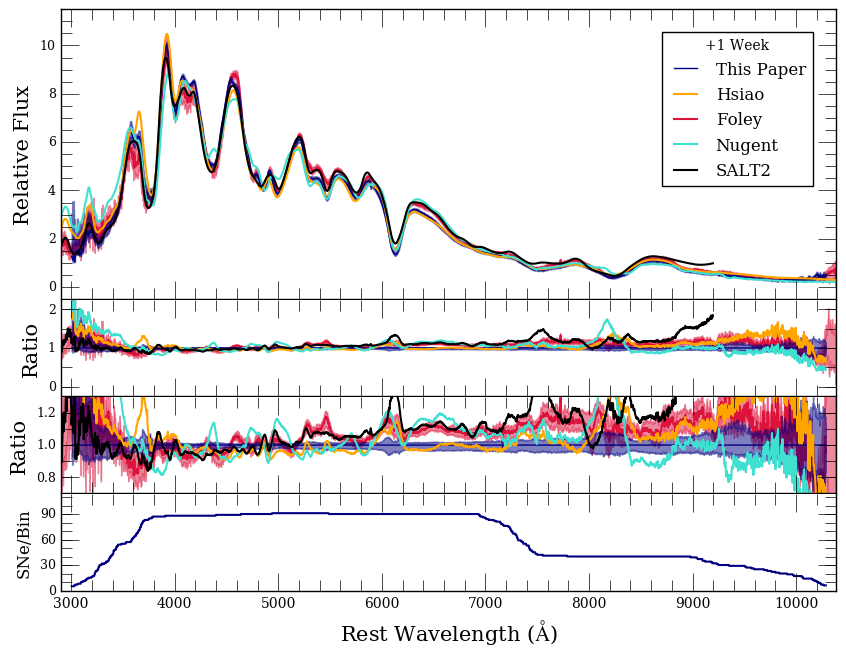

In [60]:
query_db.set_min_num_spec(composites_1week, 5)

comps_and_temps = []
for comp in composites_1week:
    comps_and_temps.append(comp)

srange = np.where((s_template_1week.wavelength > 2000.) & (s_template_1week.wavelength < 9200))[0]
s_template_1week.x1 = srange[0]
s_template_1week.x2 = srange[-1]

comps_and_temps.append(h_template_1week)
comps_and_temps.append(f08_template_p6)
comps_and_temps.append(n_template_1week)
comps_and_temps.append(s_template_1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong, si_min_wave
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], text='+1 Week', rm_last_label=False, zoom=True,
                     savename = 'template_comparisons_updated/temp_p7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], rm_last_label=True, zoom=True, text='+1 Week')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum", "Hsiao", "Foley08","Nugent","SALT2"], text='+1 Week', rm_last_label=True, zoom=True,
#                      )
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

In [61]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"],
#                      rm_last_label=True, text='$+$1 Week',
#                      savename = 'template_comparisons_updated/temp_p7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"],
#                      rm_last_label=True, text='+1 Week',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Foley08","Nugent","SALT2"],
#                      rm_last_label=True, text='$+$1 Week')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Nugent","SALT2"])

In [62]:
wave_h_m1week = []
flux_h_m1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == -7.0:
        wave_h_m1week.append(wavelength_hsiao[i])
        flux_h_m1week.append(flux_hsiao[i])

In [63]:
wave_interp_h_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_m1week = inter.splrep(wave_h_m1week, flux_h_m1week)
flux_interp_h_m1week = inter.splev(wave_interp_h_m1week, flux_spl_h_m1week, ext = 3)
h_template_m1week = composite.supernova(wave_interp_h_m1week, flux_interp_h_m1week)
h_template_m1week.phase_array = np.zeros(len(flux_interp_h_m1week))

In [64]:
wave_n_m1week = []
flux_n_m1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 13.0:
        wave_n_m1week.append(wavelength_nugent[i])
        flux_n_m1week.append(flux_nugent[i])

In [65]:
wave_interp_n_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_m1week = inter.splrep(wave_n_m1week, flux_n_m1week)
flux_interp_n_m1week = inter.splev(wave_interp_n_m1week, flux_spl_n_m1week, ext = 3)
n_template_m1week = composite.supernova(wave_interp_n_m1week, flux_interp_n_m1week)
n_template_m1week.phase_array = np.zeros(len(flux_interp_n_m1week))

In [66]:
wave_s_m1week = []
flux_s_m1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == -7.0:
        wave_s_m1week.append(wavelength_salt[i])
        flux_s_m1week.append(flux_salt[i])

In [67]:
wave_interp_s_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_m1week = inter.splrep(wave_s_m1week, flux_s_m1week)
flux_interp_s_m1week = inter.splev(wave_interp_s_m1week, flux_spl_s_m1week, ext = 3)
s_template_m1week = composite.supernova(wave_interp_s_m1week, flux_interp_s_m1week)
s_template_m1week.phase_array = np.zeros(len(flux_interp_s_m1week))

In [68]:
query_m1week = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -6 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))"]

In [69]:
composites_m1week, sn_arrays_m1week, boot_sn_arrays_m1week = query_db.main(len(query_m1week), query_m1week, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -6 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
142 Total Spectra found
105 questionable files currently ignored
(4, 'questionable spectra removed', 138, 'spectra left')
(2, 'Peculiar Ias removed', 136, 'spectra left')
114 valid spectra found
Arrays cleaned
3 spectra may have telluric contamination
67 total SNe
removed SNe without host corrections
Using 105 spectra of 64 SNe
Gini balancing...
Balanced after 15 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
52 Total Spectra found
105 questionable files currently ignored
(3, 'questionable spectra removed', 49, 'spectra left')
(0, 'Peculiar I

dm15:
1.11349326877
1.12972336461
phase:
-6.97955565791
-6.97050989802
Comp v =  12565.0789473
Comp v =  12466.8773158
Hsiao v =  11682.3277084
Foley v =  12074.3661582
Nugent v =  11486.4857972
SALT2 v =  12663.3101106
Phase:  -6.96509333244
dm15:  1.10120503061
Redshift:  0.0107253820022


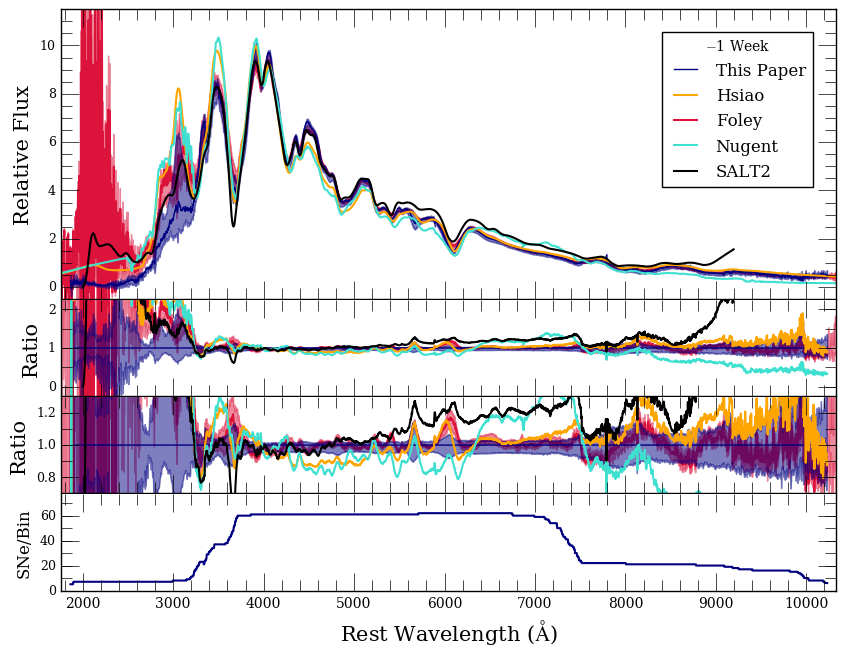

In [70]:
query_db.set_min_num_spec(composites_m1week, 5)
comps_and_temps = []
for comp in composites_m1week:
    comps_and_temps.append(comp)
    
srange = np.where((s_template_m1week.wavelength > 2000.) & (s_template_m1week.wavelength < 9200))[0]
s_template_m1week.x1 = srange[0]
s_template_m1week.x2 = srange[-1]

comps_and_temps.append(h_template_m1week)
comps_and_temps.append(f08_template_m7)
comps_and_temps.append(n_template_m1week)
comps_and_temps.append(s_template_m1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Foley", "Nugent","SALT2"], 
                     rm_last_label=False, text='$-$1 Week',
                     savename = 'template_comparisons_updated/temp_m7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Foley", "Nugent","SALT2"], text='$-$1 Week',
#                      rm_last_label=True)
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

In [71]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley+08","Nugent","SALT2"], 
#                      rm_last_label=True, text='$-$1 Week',
#                      savename = 'template_comparisons_updated/temp_m7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"], 
#                      rm_last_label=True, text='$-$1 Week',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.98 < \Delta m_{15} (B) < 1.18$)", "Hsiao", "Nugent","SALT2"])

In [72]:
wave_h_1month = []
flux_h_1month = []
for i, phase in enumerate(phase_h):
    if float(phase) == 30.0:
        wave_h_1month.append(wavelength_hsiao[i])
        flux_h_1month.append(flux_hsiao[i])

In [73]:
wave_interp_h_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1month = inter.splrep(wave_h_1month, flux_h_1month)
flux_interp_h_1month = inter.splev(wave_interp_h_1month, flux_spl_h_1month, ext = 3)
h_template_1month = composite.supernova(wave_interp_h_1month, flux_interp_h_1month)
h_template_1month.phase_array = np.zeros(len(flux_interp_h_1month))

In [74]:
wave_n_1month = []
flux_n_1month = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 50.0:
        wave_n_1month.append(wavelength_nugent[i])
        flux_n_1month.append(flux_nugent[i])

In [75]:
wave_interp_n_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1month = inter.splrep(wave_n_1month, flux_n_1month)
flux_interp_n_1month = inter.splev(wave_interp_n_1month, flux_spl_n_1month, ext = 3)
n_template_1month = composite.supernova(wave_interp_n_1month, flux_interp_n_1month)
n_template_1month.phase_array = np.zeros(len(flux_interp_n_1month))

In [76]:
wave_s_1month = []
flux_s_1month = []
for i, phase in enumerate(phase_s):
    if float(phase) == 30.0:
        wave_s_1month.append(wavelength_salt[i])
        flux_s_1month.append(flux_salt[i])

In [77]:
wave_interp_s_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1month = inter.splrep(wave_s_1month, flux_s_1month)
flux_interp_s_1month = inter.splev(wave_interp_s_1month, flux_spl_s_1month, ext = 3)
s_template_1month = composite.supernova(wave_interp_s_1month, flux_interp_s_1month)
s_template_1month.phase_array = np.zeros(len(flux_interp_s_1month))

In [78]:
query_1month = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 32 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [79]:
composites_1month, sn_arrays_1month, boot_sn_arrays_tmonth = query_db.main(len(query_1month), query_1month, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 32 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
ERROR:  2002bo_20020421_0_2_00.dat None
133 Total Spectra found
105 questionable files currently ignored
(3, 'questionable spectra removed', 130, 'spectra left')
(3, 'Peculiar Ias removed', 127, 'spectra left')
120 valid spectra found
Arrays cleaned
4 spectra may have telluric contamination
85 total SNe
removed SNe without host corrections
Using 113 spectra of 83 SNe
Gini balancing...
Balanced after 26 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
ERROR:  2002bo_20020421_0_2_00.dat None
59 Total Spectra found
105 questionable files currently ign

dm15:
1.13457728201
1.08706318757
phase:
29.6885325865
29.8382635137
Phase:  29.6851812039
dm15:  1.13337718555
Redshift:  0.014678639718


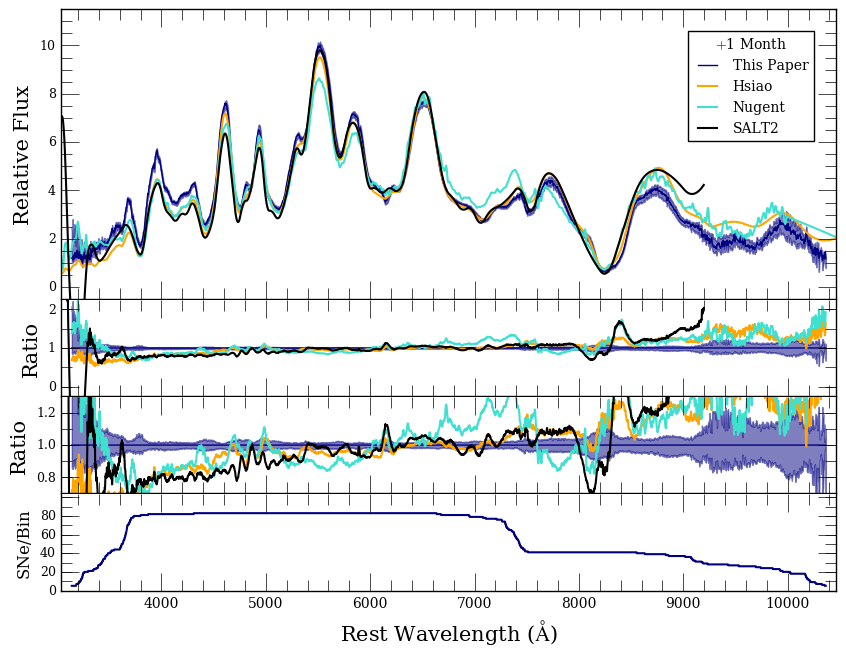

In [80]:
query_db.set_min_num_spec(composites_1month, 5)
comps_and_temps = []
for comp in composites_1month:
    comps_and_temps.append(comp)

srange = np.where((s_template_1month.wavelength > 2000.) & (s_template_1month.wavelength < 9200))[0]
s_template_1month.x1 = srange[0]
s_template_1month.x2 = srange[-1]

comps_and_temps.append(h_template_1month)
comps_and_temps.append(n_template_1month)
comps_and_temps.append(s_template_1month)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Nugent","SALT2"], text='$+$1 Month',
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p30_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Nugent","SALT2"], text='$+$1 Month',
#                      rm_last_label=True)
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

Phase:  29.8382635137
dm15:  1.08706318757
Redshift:  0.0125851135535


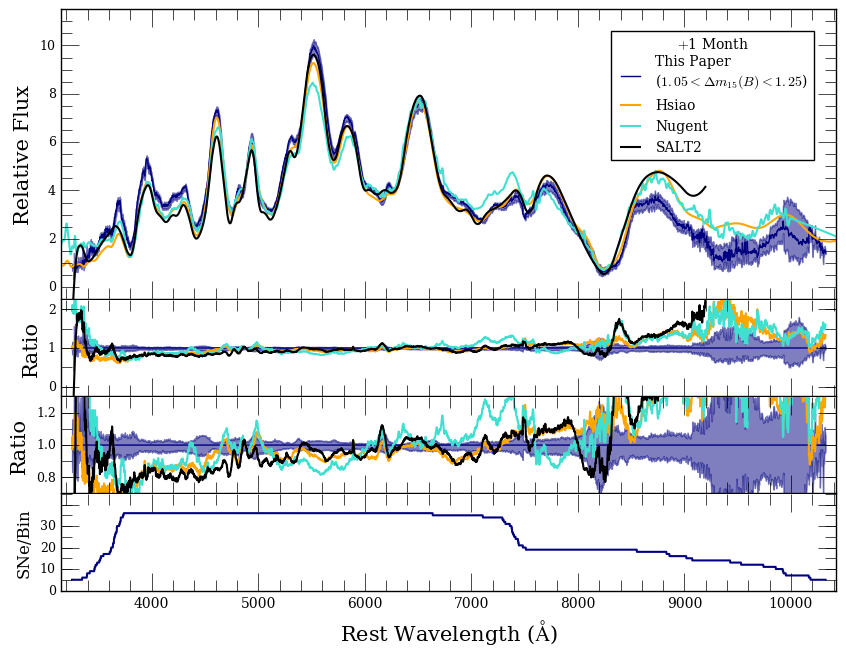

In [81]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True, text='$+$1 Month',
                     savename = 'template_comparisons_updated/temp_p30_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Nugent","SALT2"], 
#                      rm_last_label=True, text='$+$1 Month',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.95 < \Delta m_{15} (B) < 1.15$)", "Hsiao", "Nugent","SALT2"])

## 91t and 91bg nugent maximum light comparisons

In [82]:
# query_91t = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'"]

In [83]:
# composites_91t, sn_arrays_91t, boot_sn_arrays_91t = query_db.main(len(query_91t), query_91t, boot='b', medmean=1, verbose=False)

In [84]:
# query_db.set_min_num_spec(composites_91t, 5)

In [85]:
# comps_and_temps = []
# for comp in composites_91t:
#     comps_and_temps.append(comp)
# comps_and_temps.append(n_template_91t)
# comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

# print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
# comps_and_temps[0].name = "Comp"
# comps_and_temps[1].name = "Nugent"
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($ 0.75 < \Delta m_{15} (B) < 0.90$)", "Nugent-91T"])

In [86]:
query_91bg = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8))"]

In [87]:
composites_91bg, sn_arrays_91bg, boot_sn_arrays_91bg = query_db.main(len(query_91bg), query_91bg, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8))
38 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 37, 'spectra left')
(1, 'Peculiar Ias removed', 36, 'spectra left')
30 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
12 total SNe
removed SNe without host corrections
Using 30 spectra of 12 SNe
Gini balancing...
Balanced after 5 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


1.88596201906
Phase:  0.111543648892
dm15:  1.88596201906
Redshift:  0.00968204503345


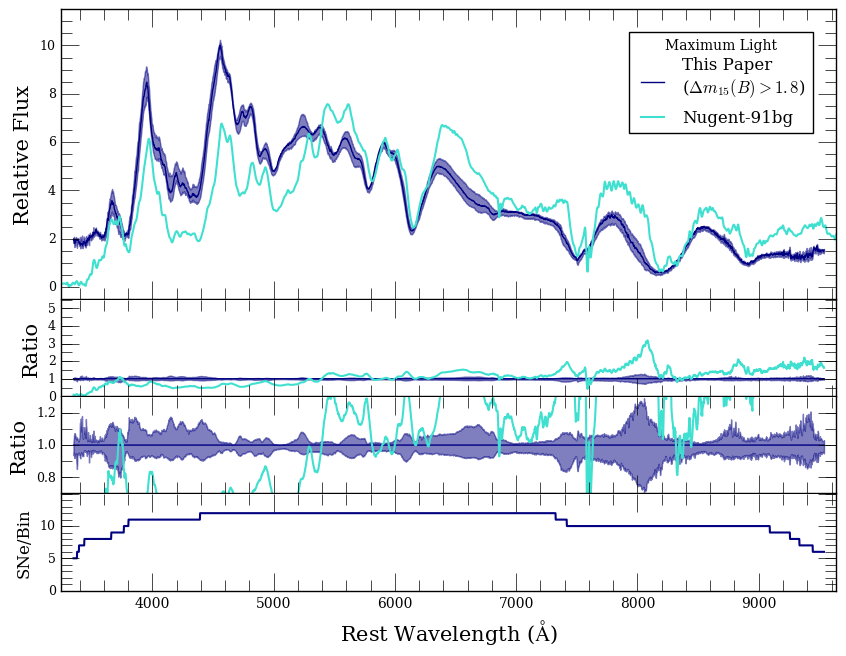

In [88]:
query_db.set_min_num_spec(composites_91bg, 5)
comps_and_temps = []
for comp in composites_91bg:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91bg)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
                     legend_labels = ["This Paper \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
                     rm_last_label=True, expand_ratio=True, text='Maximum Light',
                     savename = 'template_comparisons_updated/temp_max_light_91bg')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
#                      rm_last_label=True, expand_ratio=True, text='Maximum Light')